In [17]:
import pickle
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors




In [18]:
with open("best.p","rb") as f:
    og_gdf = pickle.load(f)

og_gdf.keys()

dict_keys(['actor_critic_dict', 'loss_iter', 'best_rewards', 'best_plans', 'current_rewards', 'current_plans', 'iteration'])

In [34]:
og_gdf['current_plans'][0]


{'road_network': 0.74668383434,
 'life_circle': 1.3583223582333377,
 'greenness': 0.6554084049829839,
 'wastemgmt': 0.676444845,
 'drainage': 0,
 'concept': -1.0,
 'life_circle_info': {'life_circle_15min': 0.9122807017543861,
  'life_circle_10min': 0.543859649122807,
  'life_circle_5min': 0.31578947368421045,
  'life_circle_10min_area': 0.5072379984991058,
  'decentralization_reward': 0.27529527538359383,
  'utility': 0.16304778109745893,
  'even_population_distribution_reward': 0.5476685252855651,
  'traffic_reward': 0.38994655137717715,
  'shopping': 0.21052631578947367,
  'education': 0.5263157894736842,
  'medical care': 0.6842105263157895,
  'entertainment': 0.8421052631578947,
  'working': 0.6842105263157895},
 'concept_info': {},
 'land_use_reward': 11.521987270849685,
 'gdf':      type  existence                                   geometry   population  \
 0       2       True                  LINESTRING (440 0, 820 0)     0.000000   
 1       2       True                LINESTR

In [20]:
{key: og_gdf['current_plans'][0][key] for key in ['land_use_reward'] if key in og_gdf['current_plans'][0]}

{'land_use_reward': 11.521987270849685}

In [37]:
gdf = og_gdf['best_plans'][0]['gdf']
gdf

,type,existence,geometry,population,traffic,rect,eqi,sc
0,2,True,"LINESTRING (440 0, 820 0)",0.000000,NaN,NaN,NaN,NaN
1,2,True,"LINESTRING (1280 0, 1700 0)",730.434783,NaN,NaN,NaN,NaN
2,2,True,"LINESTRING (1700 0, 2160 0)",1102.083333,NaN,NaN,NaN,NaN
3,2,True,"LINESTRING (0 1860, 100 1540)",691.998019,NaN,NaN,NaN,NaN
4,2,True,"LINESTRING (100 1540, 160 1360)",0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
112,16,True,"LINESTRING (1620 1700, 1610.213 1866.379)",NaN,NaN,NaN,NaN,NaN
113,16,True,"LINESTRING (1860 1615, 1860 1700)",NaN,NaN,NaN,NaN,NaN
114,16,True,"LINESTRING (1610.213 1866.379, 1600 2040)",NaN,NaN,NaN,NaN,NaN
115,16,True,"LINESTRING (1860 1700, 2080 1700)",NaN,NaN,NaN,NaN,NaN


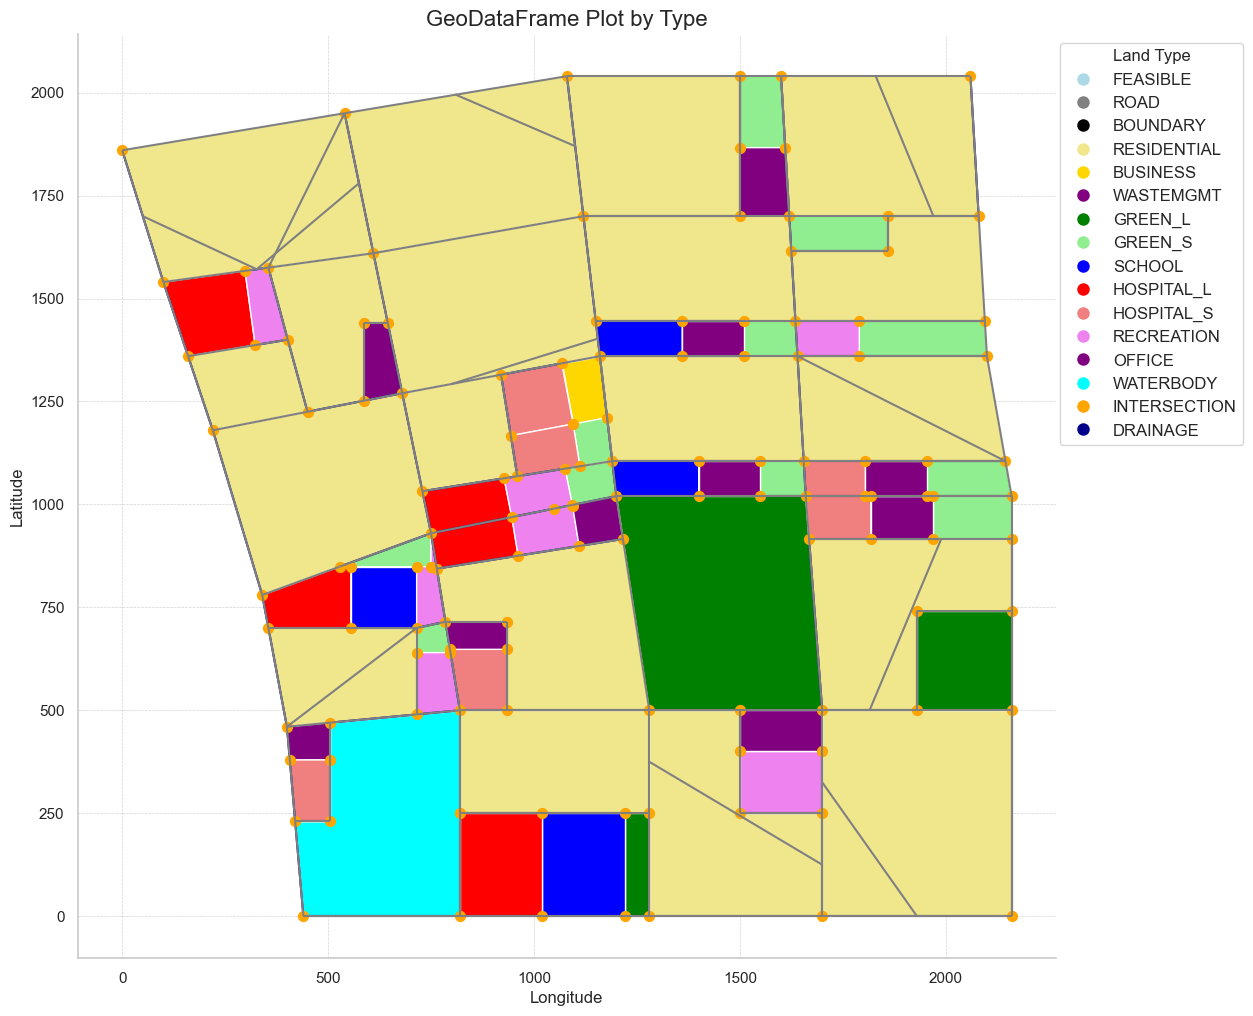

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define color map for each type
type_colors = {
    1: "lightblue",       # FEASIBLE
    2: "gray",            # ROAD
    3: "black",           # BOUNDARY
    4: "khaki",           # RESIDENTIAL
    5: "gold",            # BUSINESS
    6: "purple",           # WASTEMGMT
    7: "green",           # GREEN_L
    8: "lightgreen",      # GREEN_S
    9: "blue",            # SCHOOL
    10: "red",            # HOSPITAL_L
    11: "lightcoral",     # HOSPITAL_S
    12: "violet",         # RECREATION
    13: "purple",         # OFFICE
    14: "aqua",           # WATERBODY
    15: "orange",         # INTERSECTION
    16: "darkblue"        # DRAINAGE
}

# Legend labels
legend_labels = {
    1: "FEASIBLE",
    2: "ROAD",
    3: "BOUNDARY",
    4: "RESIDENTIAL",
    5: "BUSINESS",
    6: "WASTEMGMT",
    7: "GREEN_L",
    8: "GREEN_S",
    9: "SCHOOL",
    10: "HOSPITAL_L",
    11: "HOSPITAL_S",
    12: "RECREATION",
    13: "OFFICE",
    14: "WATERBODY",
    15: "INTERSECTION",
    16: "DRAINAGE"
}

# Create the plot
fig, ax = plt.subplots(figsize=(14, 12))

# Plot each type with distinct color and layer points on top with larger markersize
for type_value, color in type_colors.items():
    subset = gdf[gdf['type'] == type_value]
    
    # Roads are plotted last and with a higher z-order to ensure visibility
    if type_value == 2:
        subset.plot(ax=ax, color=color, linewidth=1.5, label=legend_labels[type_value], zorder=4)
    elif subset.geometry.iloc[0].geom_type == 'Point':
        subset.plot(ax=ax, color=color, markersize=50, label=legend_labels[type_value], zorder=3)
    else:
        subset.plot(ax=ax, color=color, label=legend_labels[type_value], zorder=2)

# Set custom legend with all labels included
legend_handles = []
for type_value, label in legend_labels.items():
    handle = plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=type_colors[type_value])
    legend_handles.append(handle)

ax.legend(handles=legend_handles, title="Land Type", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')

# Additional styling
plt.title("GeoDataFrame Plot by Type", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')

plt.show()


/var/folders/64/wztrq55x0w5_s8m0f0tld8180000gn/T/ipykernel_9018/3615257919.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(title="Types", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')


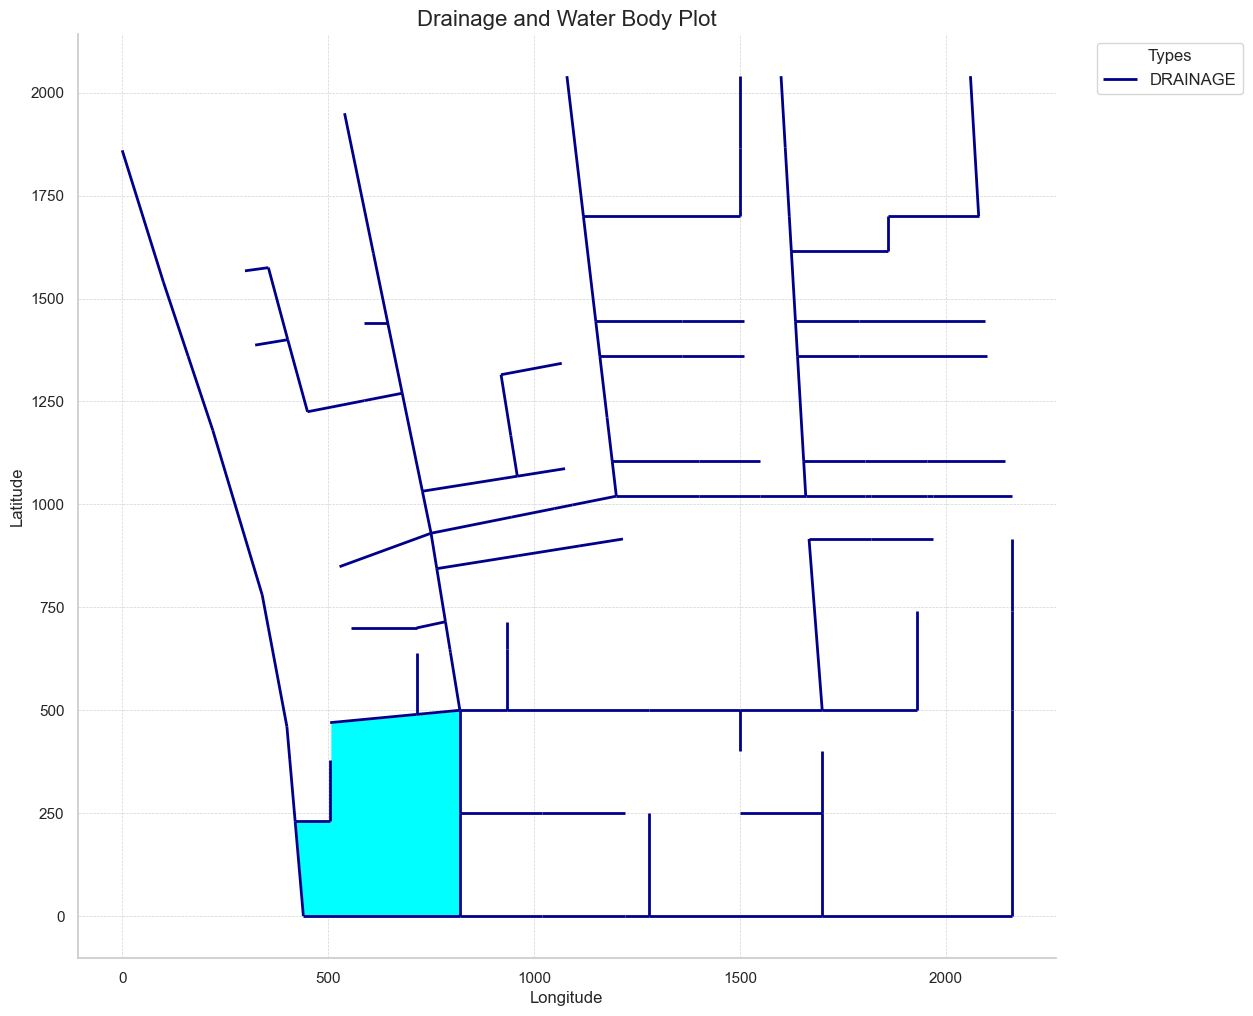

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define color map for drainage and water bodies
drainage_color = "darkblue"  # Color for drainage
waterbody_color = "aqua"      # Color for water bodies

# Create the plot
fig, ax = plt.subplots(figsize=(14, 12))

# Plot drainage lines
drainage_lines = gdf[gdf['type'] == 16]
if not drainage_lines.empty:
    drainage_lines.plot(ax=ax, color=drainage_color, linewidth=2, label="DRAINAGE", zorder=2)

# Plot water bodies
water_bodies = gdf[gdf['type'] == 14]
if not water_bodies.empty:
    water_bodies.plot(ax=ax, color=waterbody_color, label="WATERBODY", zorder=1)

# Set custom legend
ax.legend(title="Types", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')

# Additional styling
plt.title("Drainage and Water Body Plot", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')

plt.show()


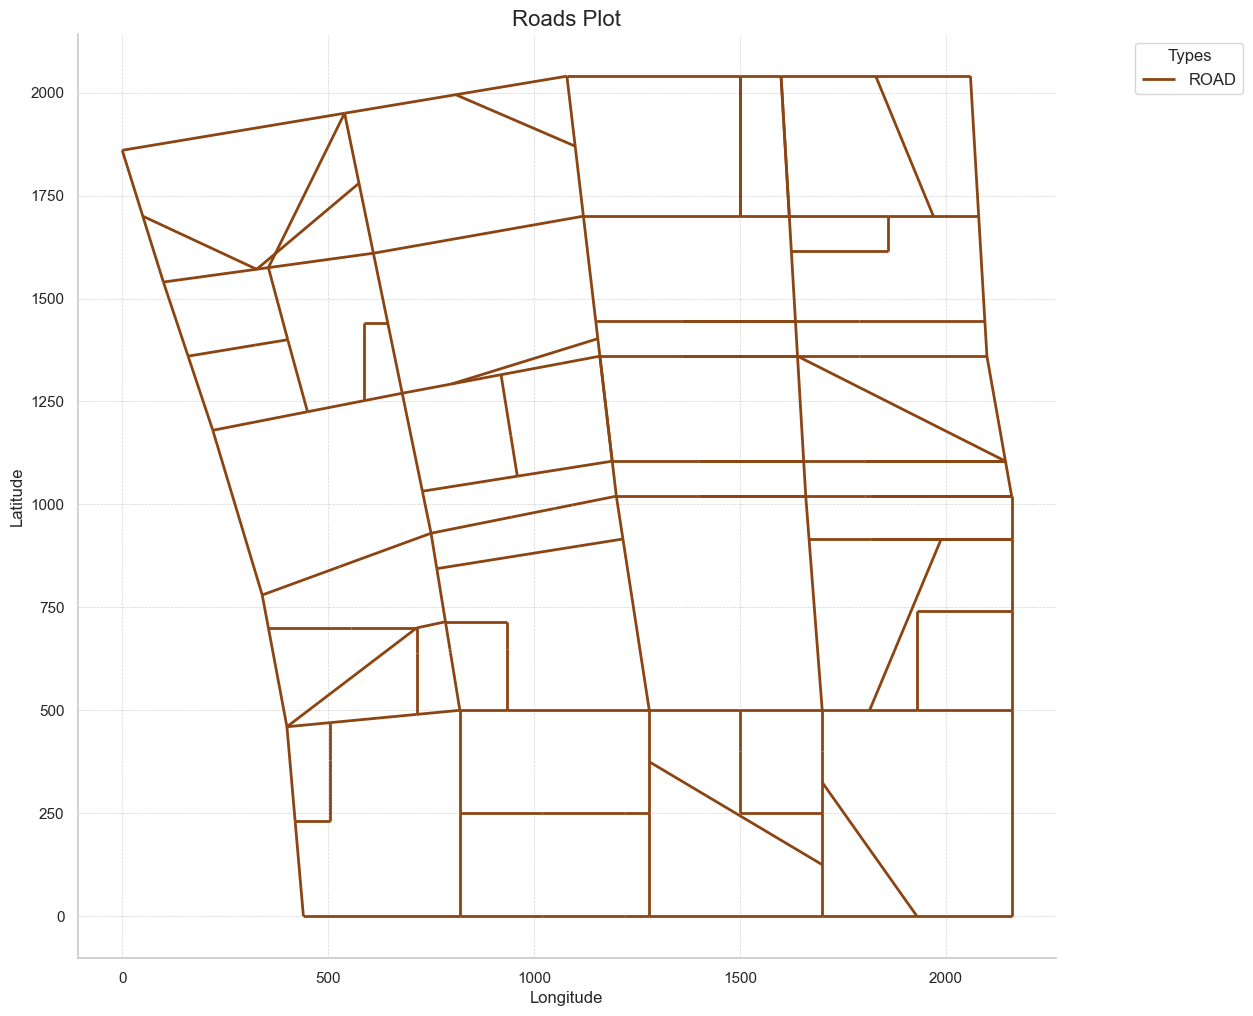

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define color for roads
road_color = "saddlebrown"  # Color for roads

# Create the plot
fig, ax = plt.subplots(figsize=(14, 12))

# Plot all roads
roads = gdf[gdf['type'] == 2]  # Assuming '2' corresponds to ROAD type
if not roads.empty:
    roads.plot(ax=ax, color=road_color, linewidth=2, label="ROAD", zorder=2)

# Set custom legend
ax.legend(title="Types", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')

# Additional styling
plt.title("Roads Plot", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')

plt.show()


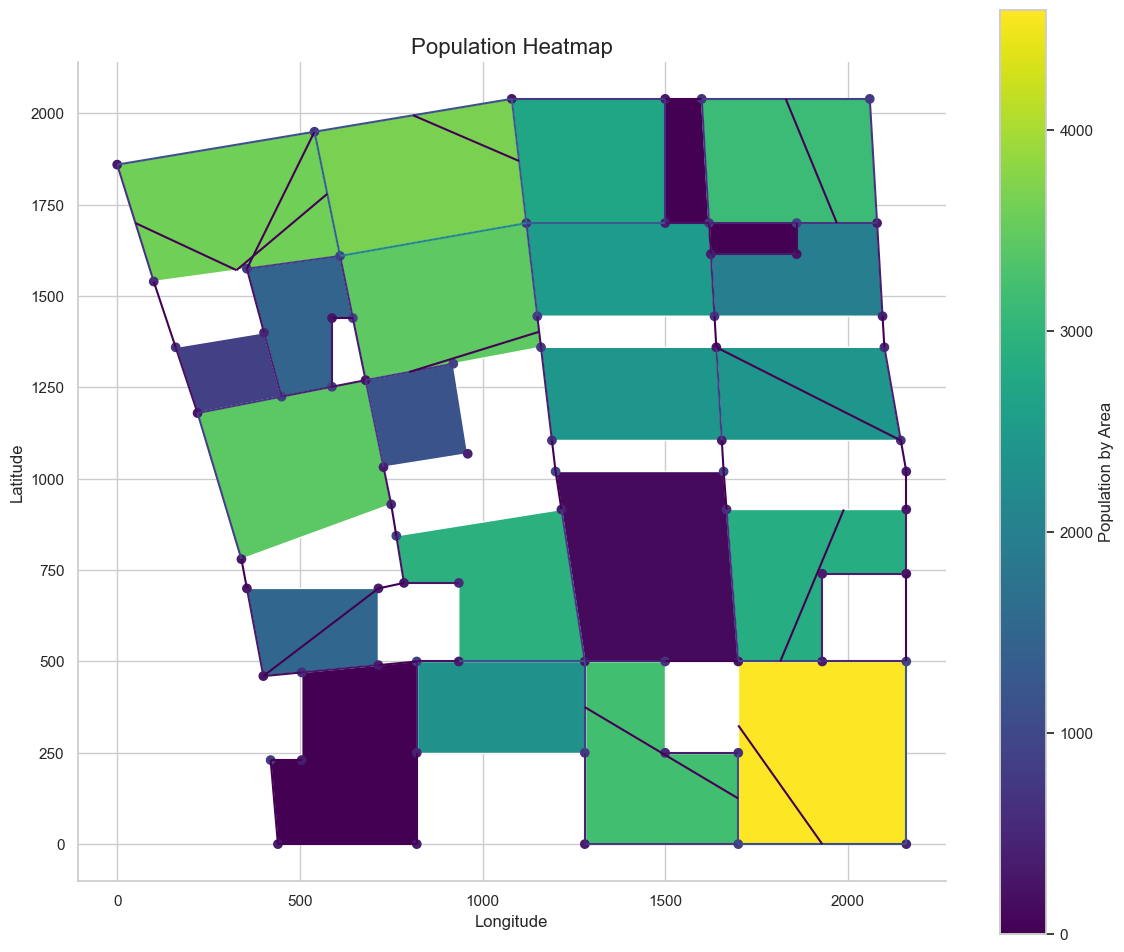

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plot the geometries, coloring them by population
gdf.plot(column='population', ax=ax, cmap='viridis', legend=True,
         legend_kwds={'label': "Population by Area", 'orientation': "vertical"})

# Add titles and labels
plt.title("Population Heatmap", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look

# Show the plot
plt.show()


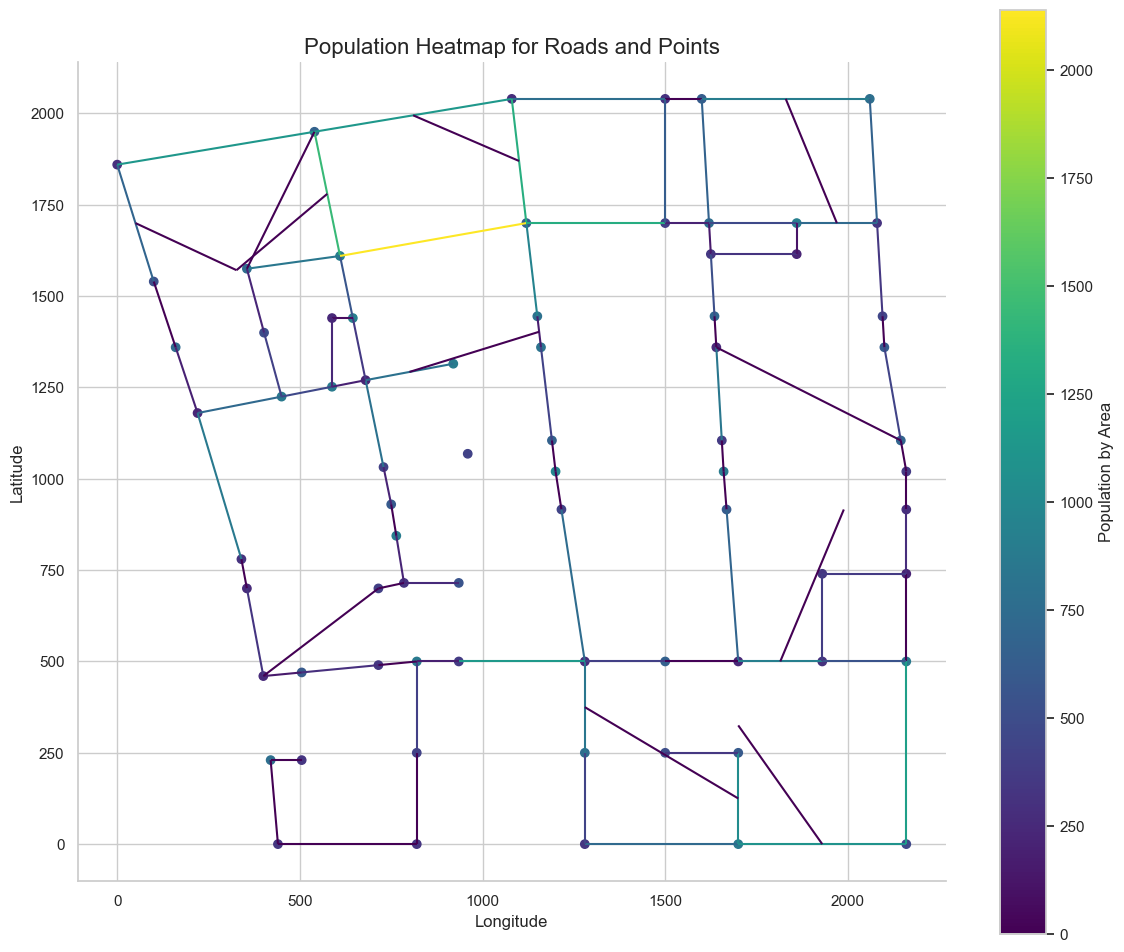

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Filter the GeoDataFrame for roads and points
roads_and_points_gdf = gdf[gdf['geometry'].geom_type.isin(['Point', 'LineString'])]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Plot the geometries, coloring them by population
# Note: Points will be plotted as dots and roads as lines, but the color will represent population
roads_and_points_gdf.plot(column='population', ax=ax, cmap='viridis', legend=True,
                          legend_kwds={'label': "Population by Area", 'orientation': "vertical"})

# Add titles and labels
plt.title("Population Heatmap for Roads and Points", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look

# Show the plot
plt.show()


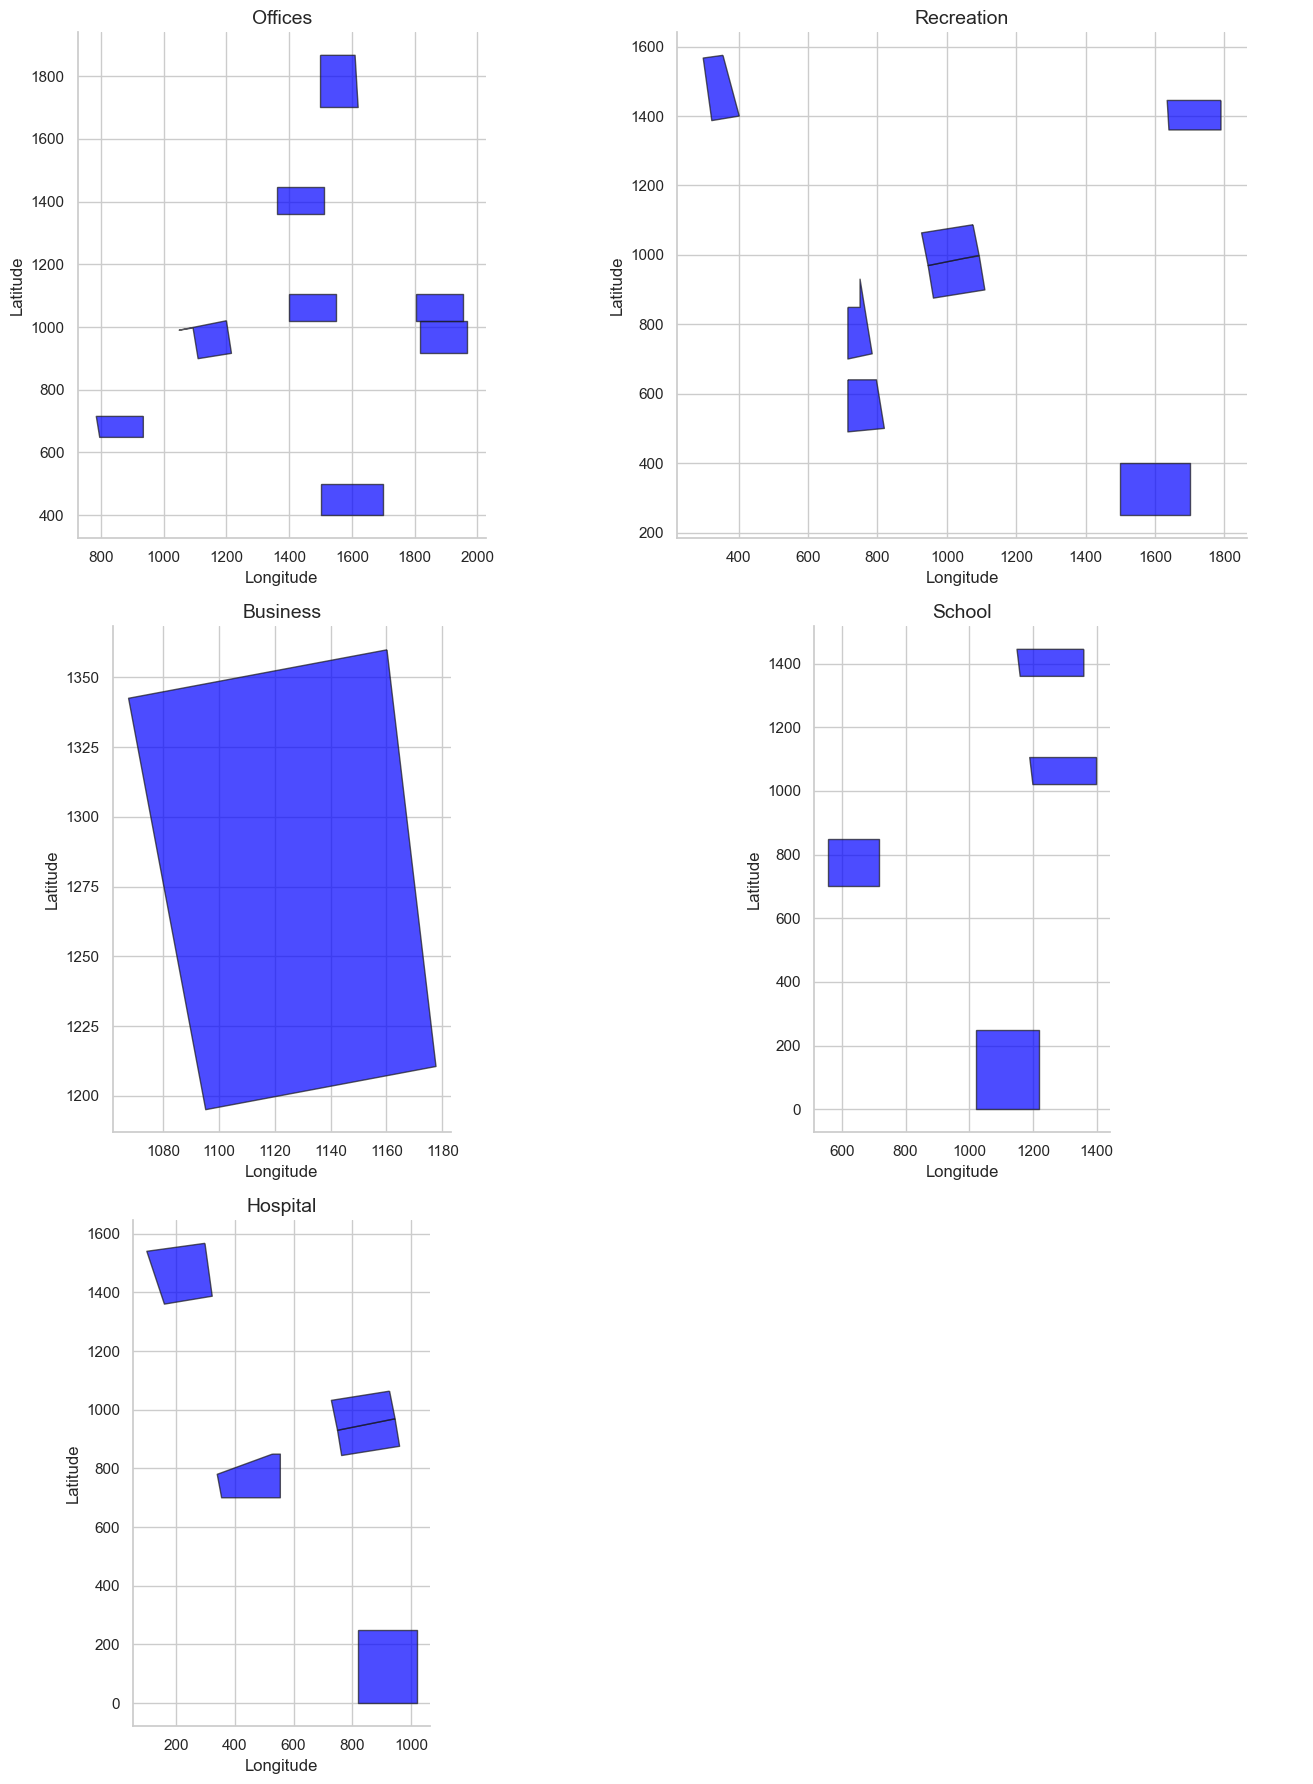

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define land type codes for filtering
land_types = {
    'Offices': 13,
    'Recreation': 12,
    'Business': 5,
    'School': 9,
    'Hospital': 10  # Assuming you want to plot one type of hospitals
}

# Calculate the number of plots needed
num_plots = len(land_types)
ncols = 2
nrows = math.ceil(num_plots / ncols)

# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 6 * nrows))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

# Iterate over the land types and plot each
for ax, (label, land_type) in zip(axs, land_types.items()):
    # Filter the GeoDataFrame for the specific land type
    land_gdf = gdf[gdf['type'] == land_type]

    # Plot the filtered GeoDataFrame
    land_gdf.plot(ax=ax, color='blue', alpha=0.7, edgecolor='k')

    # Set title and labels
    ax.set_title(label, fontsize=14)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    sns.despine(ax=ax)  # Remove borders for a cleaner look

# Hide any remaining empty subplots if there are fewer land types than subplots
for ax in axs[num_plots:]:
    ax.axis('off')  # Hide the empty axes

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


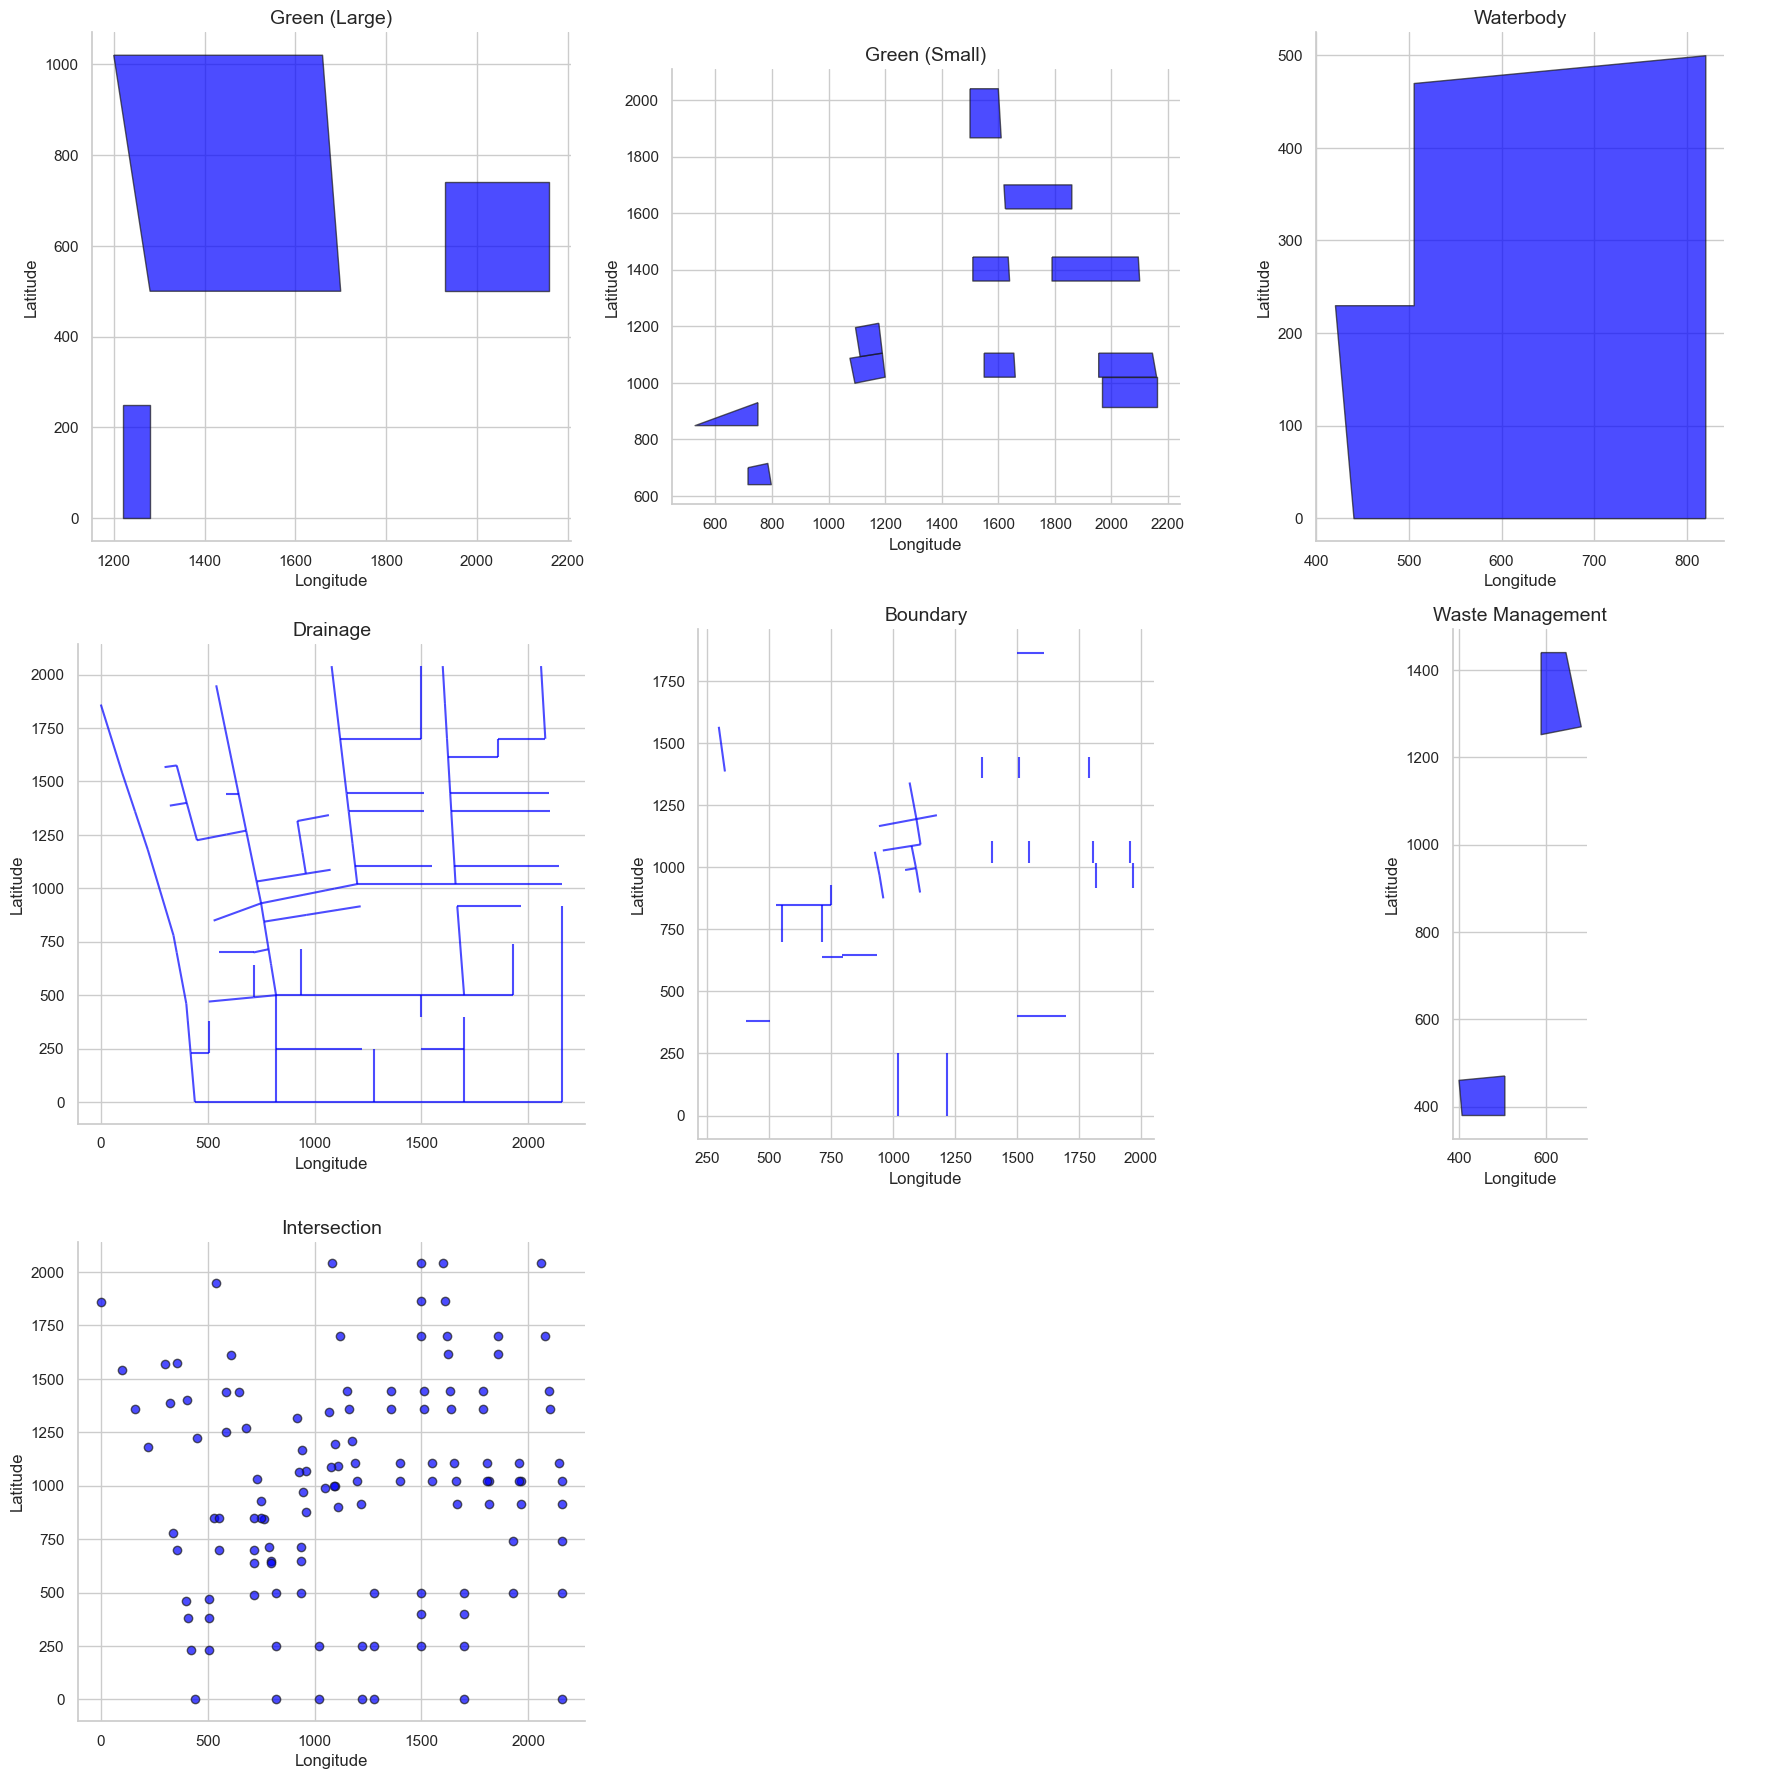

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define all land type codes for filtering
land_types = {

    'Green (Large)': 7,
    'Green (Small)': 8,
    'Waterbody': 14,
    'Drainage': 16,
    'Boundary': 3,
    'Waste Management': 6,
    'Intersection': 15,
}

# Calculate the number of plots needed
num_plots = len(land_types)
ncols = 3  # You can adjust the number of columns here
nrows = math.ceil(num_plots / ncols)

# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 6 * nrows))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

# Iterate over the land types and plot each
for ax, (label, land_type) in zip(axs, land_types.items()):
    # Filter the GeoDataFrame for the specific land type
    land_gdf = gdf[gdf['type'] == land_type]

    # Plot the filtered GeoDataFrame if it is not empty
    if not land_gdf.empty:
        land_gdf.plot(ax=ax, color='blue', alpha=0.7, edgecolor='k')
        ax.set_title(label, fontsize=14)
    else:
        ax.set_title(f"{label} (No Data)", fontsize=14)

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    sns.despine(ax=ax)  # Remove borders for a cleaner look

# Hide any remaining empty subplots if there are fewer land types than subplots
for ax in axs[num_plots:]:
    ax.axis('off')  # Hide the empty axes

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x1000 with 0 Axes>

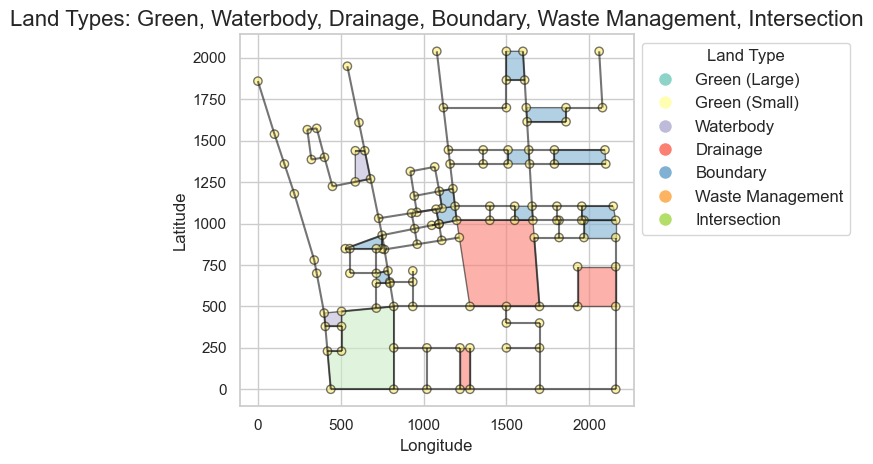

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define the specific land types you want to plot
land_types_to_plot = {
    'Green (Large)': 7,
    'Green (Small)': 8,
    'Waterbody': 14,
    'Drainage': 16,
    'Boundary': 3,
    'Waste Management': 6,
    'Intersection': 15,
}

# Filter the GeoDataFrame for the specified land types
selected_types = list(land_types_to_plot.values())
filtered_gdf = gdf[gdf['type'].isin(selected_types)]

# Create a plot
plt.figure(figsize=(12, 10))

# Plot the filtered GeoDataFrame
filtered_gdf.plot(column='type', cmap='Set3', alpha=0.6, edgecolor='k', legend=False)

# Create custom legend handles
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Set3(i), markersize=10) 
                  for i in range(len(land_types_to_plot))]
legend_labels = list(land_types_to_plot.keys())

# Add title and labels
plt.title("Land Types: Green, Waterbody, Drainage, Boundary, Waste Management, Intersection", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add custom legend, positioning it outside the plot
plt.legend(legend_handles, legend_labels, title="Land Type", loc='upper left', bbox_to_anchor=(1, 1), fontsize='medium')

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()


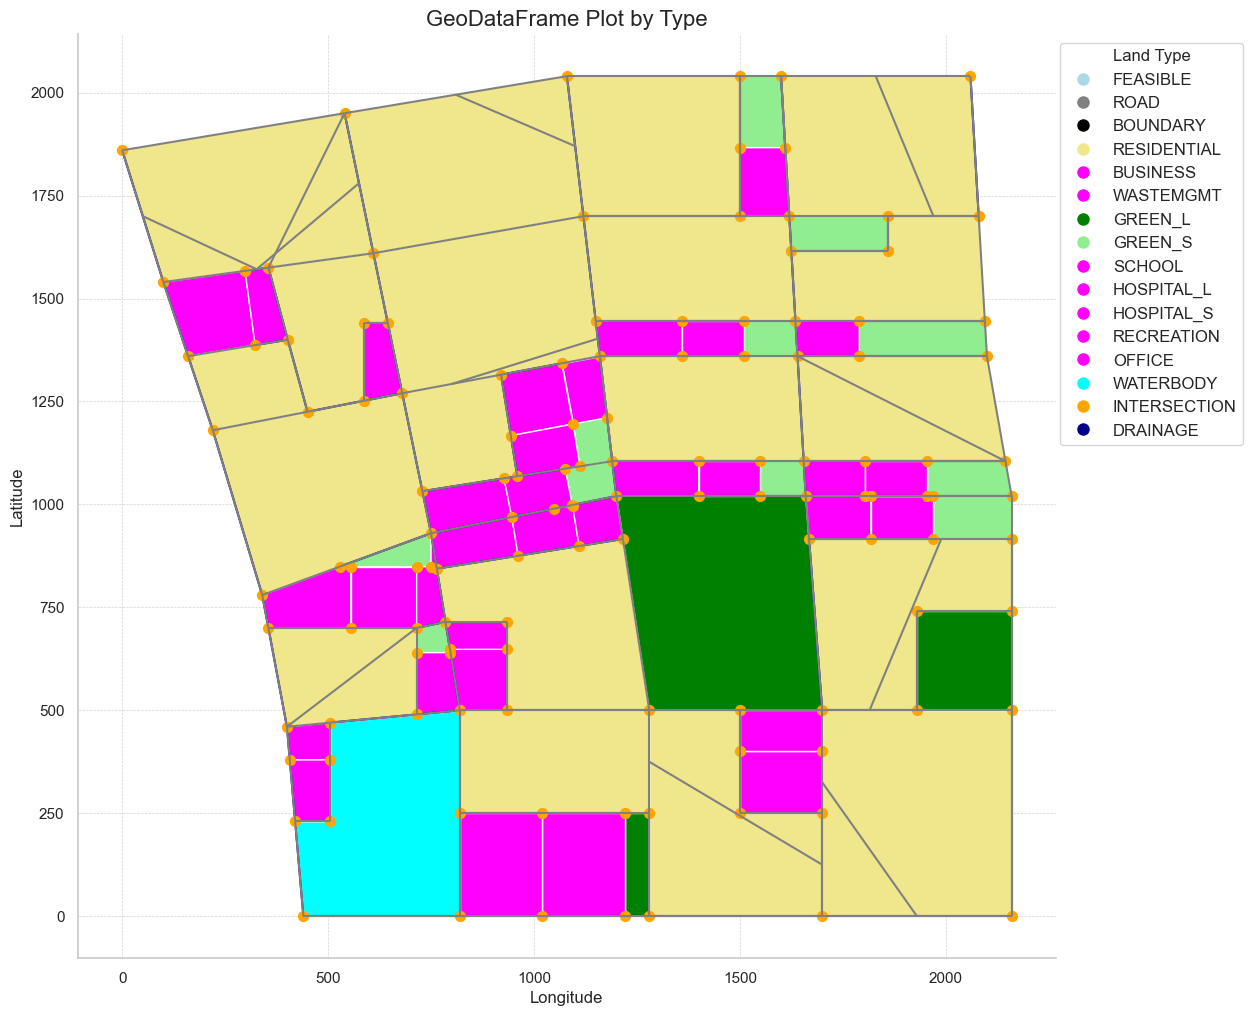

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define color map for each type
type_colors = {
    1: "lightblue",       # FEASIBLE
    2: "gray",            # ROAD
    3: "black",           # BOUNDARY
    4: "khaki",           # RESIDENTIAL
    5: "gold",            # BUSINESS
    6: "brown",           # WASTEMGMT
    7: "green",           # GREEN_L
    8: "lightgreen",      # GREEN_S
    9: "blue",            # SCHOOL
    10: "red",            # HOSPITAL_L
    11: "lightcoral",     # HOSPITAL_S
    12: "violet",         # RECREATION
    13: "purple",         # OFFICE
    14: "aqua",           # WATERBODY
    15: "orange",         # INTERSECTION
    16: "darkblue"        # DRAINAGE
}

# Highlight color for public services
highlight_color = 'magenta'  # Color to highlight public services

# Legend labels
legend_labels = {
    1: "FEASIBLE",
    2: "ROAD",
    3: "BOUNDARY",
    4: "RESIDENTIAL",
    5: "BUSINESS",
    6: "WASTEMGMT",
    7: "GREEN_L",
    8: "GREEN_S",
    9: "SCHOOL",
    10: "HOSPITAL_L",
    11: "HOSPITAL_S",
    12: "RECREATION",
    13: "OFFICE",
    14: "WATERBODY",
    15: "INTERSECTION",
    16: "DRAINAGE"
}

# Define public service types
PUBLIC_SERVICES_ID = (
    5,  # BUSINESS
    6,  # WASTEMGMT
    9,  # SCHOOL
    10, # HOSPITAL_L
    11, # HOSPITAL_S
    12, # RECREATION
    13  # OFFICE
)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 12))

# Plot each type with distinct color and layer points on top with larger markersize
for type_value, color in type_colors.items():
    subset = gdf[gdf['type'] == type_value]

    # Highlight public services
    if type_value in PUBLIC_SERVICES_ID:
        color = highlight_color  # Change color for public services

    # Roads are plotted last and with a higher z-order to ensure visibility
    if type_value == 2:
        subset.plot(ax=ax, color=color, linewidth=1.5, label=legend_labels[type_value], zorder=4)
    elif subset.geometry.iloc[0].geom_type == 'Point':
        subset.plot(ax=ax, color=color, markersize=50, label=legend_labels[type_value], zorder=3)
    else:
        subset.plot(ax=ax, color=color, label=legend_labels[type_value], zorder=2)

# Set custom legend with all labels included
legend_handles = []
for type_value, label in legend_labels.items():
    handle = plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=type_colors[type_value] if type_value not in PUBLIC_SERVICES_ID else highlight_color)
    legend_handles.append(handle)

ax.legend(handles=legend_handles, title="Land Type", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')

# Additional styling
plt.title("GeoDataFrame Plot by Type", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')

plt.show()


/var/folders/64/wztrq55x0w5_s8m0f0tld8180000gn/T/ipykernel_25290/1194568969.py:52: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title="Land Type")


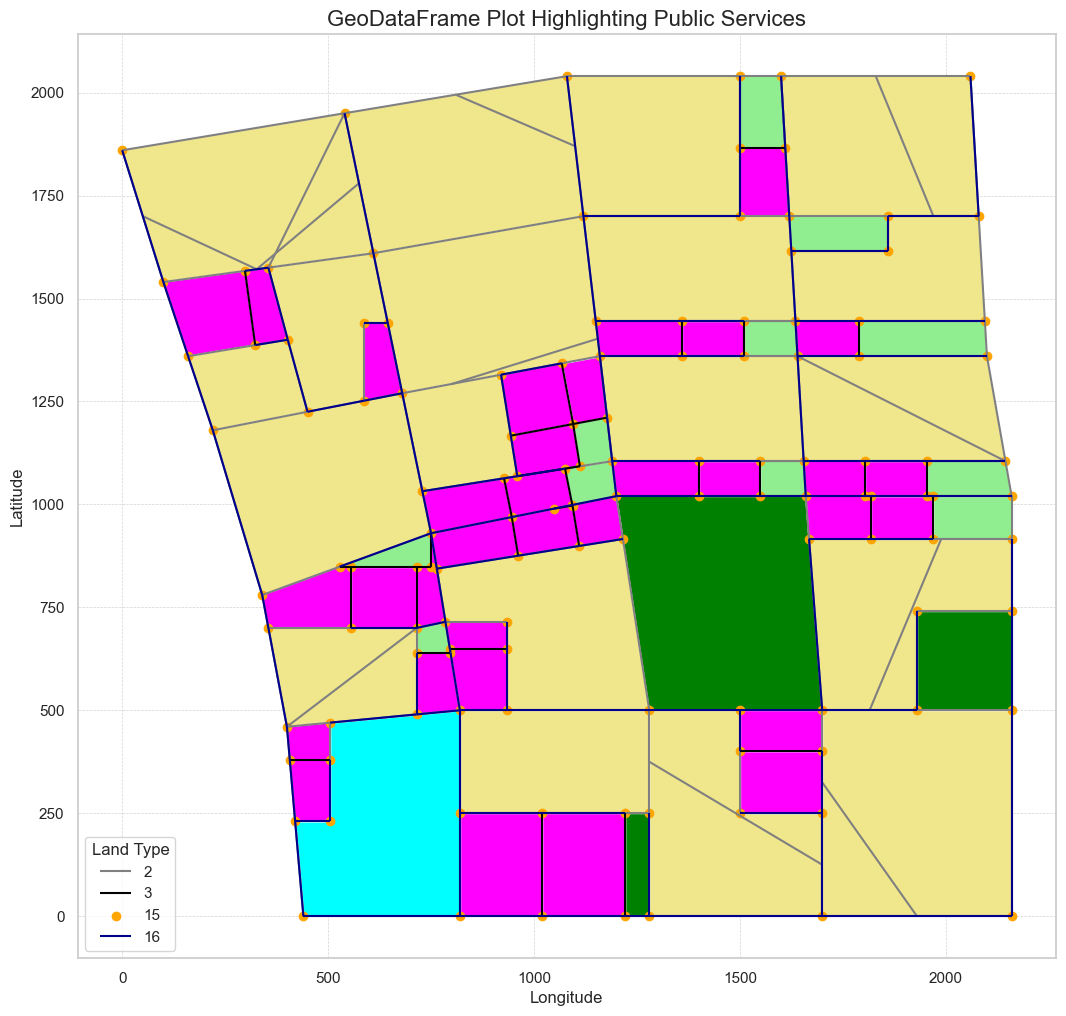

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define color map for each type
type_colors = {
    1: "lightblue",       # FEASIBLE
    2: "gray",            # ROAD
    3: "black",           # BOUNDARY
    4: "khaki",           # RESIDENTIAL
    5: "gold",            # BUSINESS
    6: "brown",           # WASTEMGMT
    7: "green",           # GREEN_L
    8: "lightgreen",      # GREEN_S
    9: "blue",            # SCHOOL
    10: "red",            # HOSPITAL_L
    11: "lightcoral",     # HOSPITAL_S
    12: "violet",         # RECREATION
    13: "purple",         # OFFICE
    14: "aqua",           # WATERBODY
    15: "orange",         # INTERSECTION
    16: "darkblue"        # DRAINAGE
}

# Highlight color for public services
highlight_color = 'magenta'  # Color to highlight public services

# Define public service types
PUBLIC_SERVICES_ID = (5, 6, 9, 10, 11, 12, 13)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 12))

# Plot each type
for type_value, color in type_colors.items():
    subset = gdf[gdf['type'] == type_value]
    
    # Highlight public services
    if type_value in PUBLIC_SERVICES_ID:
        color = highlight_color  # Change color for public services

    # Plot geometry
    subset.plot(ax=ax, color=color, label=type_value)

# Additional styling
plt.title("GeoDataFrame Plot Highlighting Public Services", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Land Type")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')
plt.show()


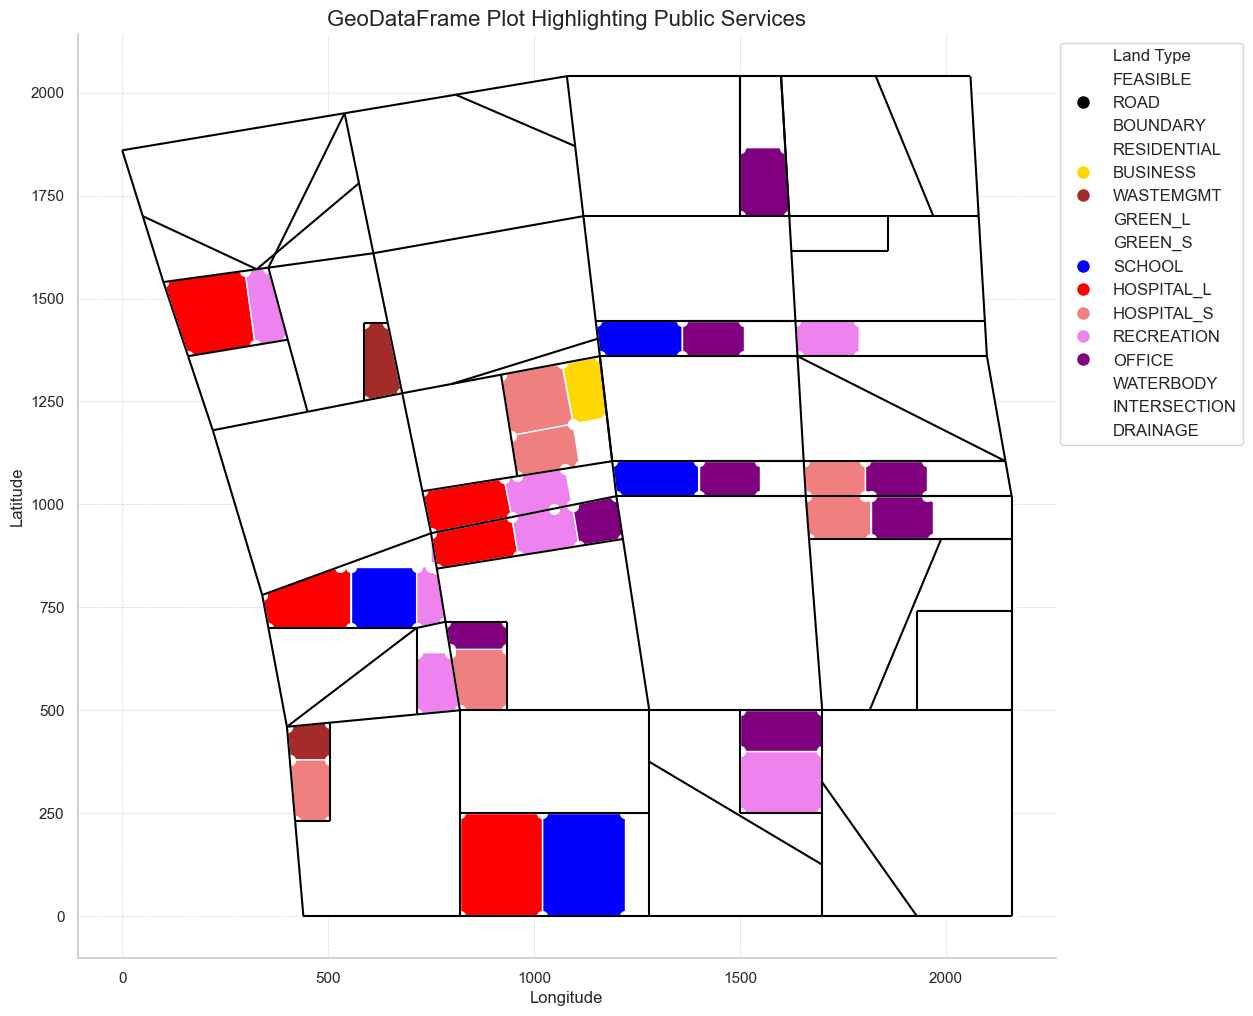

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define color map for each type
type_colors = {
    1: "white",           # FEASIBLE
    2: "black",           # ROAD
    3: "white",           # BOUNDARY
    4: "white",           # RESIDENTIAL
    5: "gold",            # BUSINESS
    6: "brown",           # WASTEMGMT
    7: "white",           # GREEN_L
    8: "white",           # GREEN_S
    9: "blue",            # SCHOOL
    10: "red",            # HOSPITAL_L
    11: "lightcoral",     # HOSPITAL_S
    12: "violet",         # RECREATION
    13: "purple",         # OFFICE
    14: "white",          # WATERBODY
    15: "white",          # INTERSECTION
    16: "white"           # DRAINAGE
}

# Legend labels
legend_labels = {
    1: "FEASIBLE",
    2: "ROAD",
    3: "BOUNDARY",
    4: "RESIDENTIAL",
    5: "BUSINESS",
    6: "WASTEMGMT",
    7: "GREEN_L",
    8: "GREEN_S",
    9: "SCHOOL",
    10: "HOSPITAL_L",
    11: "HOSPITAL_S",
    12: "RECREATION",
    13: "OFFICE",
    14: "WATERBODY",
    15: "INTERSECTION",
    16: "DRAINAGE"
}

# Create the plot
fig, ax = plt.subplots(figsize=(14, 12))

# Plot each type
for type_value, color in type_colors.items():
    subset = gdf[gdf['type'] == type_value]
    
    # Roads are plotted last and with a higher z-order to ensure visibility
    if type_value == 2:
        subset.plot(ax=ax, color=color, linewidth=1.5, label=legend_labels[type_value], zorder=4)
    elif subset.geometry.iloc[0].geom_type == 'Point':
        subset.plot(ax=ax, color=color, markersize=50, label=legend_labels[type_value], zorder=3)
    else:
        subset.plot(ax=ax, color=color, label=legend_labels[type_value], zorder=2)

# Set custom legend with all labels included
legend_handles = []
for type_value, label in legend_labels.items():
    handle = plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=type_colors[type_value])
    legend_handles.append(handle)

ax.legend(handles=legend_handles, title="Land Type", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')

# Additional styling
plt.title("GeoDataFrame Plot Highlighting Public Services", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')

plt.show()


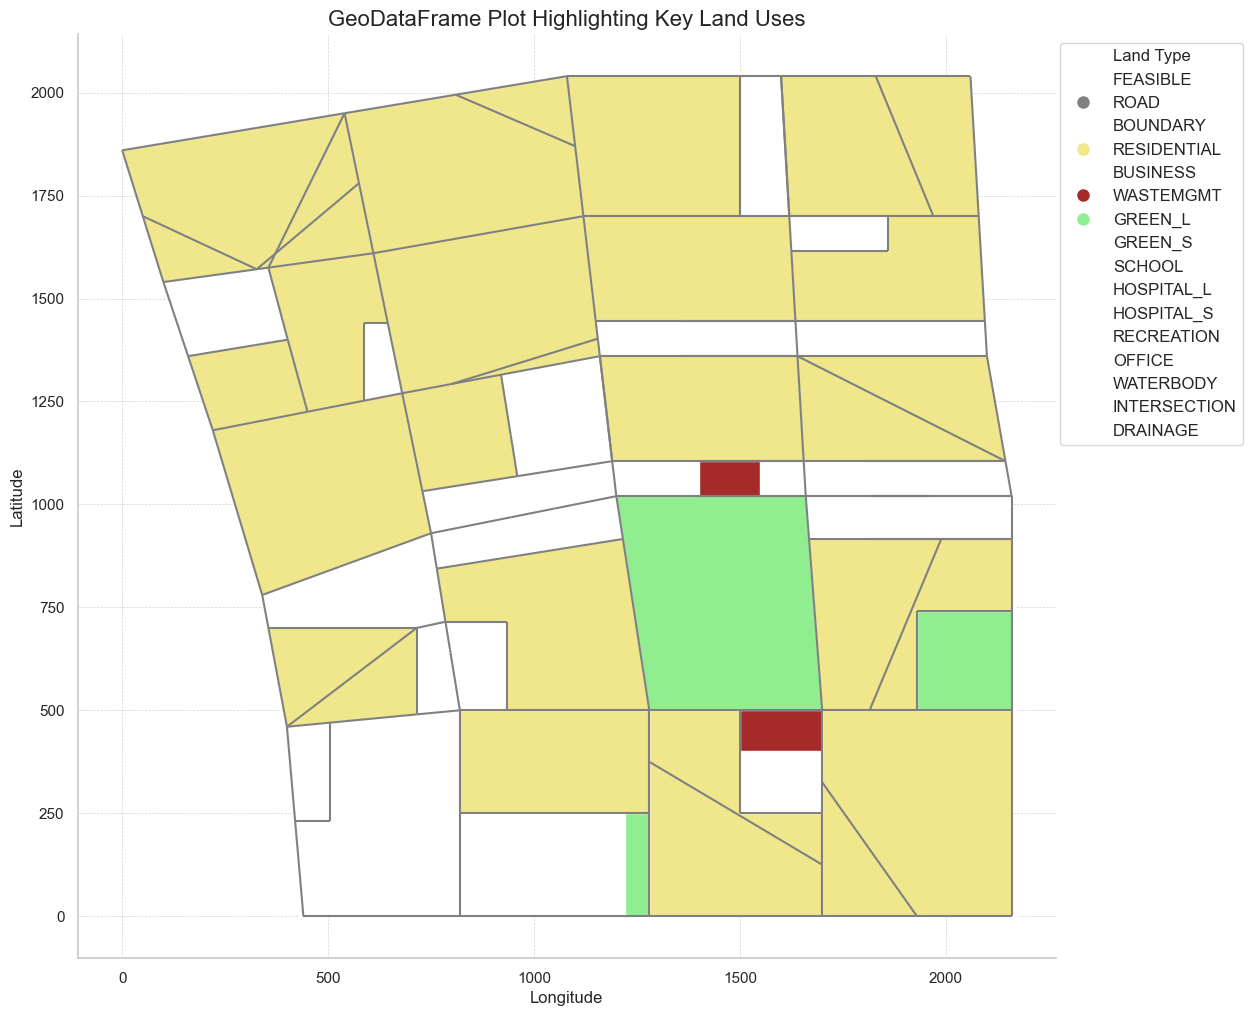

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style for a cleaner look
sns.set(style="whitegrid")

# Define color map for each type
type_colors = {
    1: "white",           # FEASIBLE
    2: "gray",            # ROAD
    3: "white",           # BOUNDARY
    4: "khaki",           # RESIDENTIAL
    5: "white",           # BUSINESS
    6: "brown",           # WASTEMGMT
    7: "lightgreen",      # GREEN_L
    8: "white",           # GREEN_S
    9: "white",           # SCHOOL
    10: "white",          # HOSPITAL_L
    11: "white",          # HOSPITAL_S
    12: "white",          # RECREATION
    13: "white",          # OFFICE
    14: "white",          # WATERBODY
    15: "white",          # INTERSECTION
    16: "white"           # DRAINAGE
}

# Legend labels
legend_labels = {
    1: "FEASIBLE",
    2: "ROAD",
    3: "BOUNDARY",
    4: "RESIDENTIAL",
    5: "BUSINESS",
    6: "WASTEMGMT",
    7: "GREEN_L",
    8: "GREEN_S",
    9: "SCHOOL",
    10: "HOSPITAL_L",
    11: "HOSPITAL_S",
    12: "RECREATION",
    13: "OFFICE",
    14: "WATERBODY",
    15: "INTERSECTION",
    16: "DRAINAGE"
}

# Create the plot
fig, ax = plt.subplots(figsize=(14, 12))

# Plot each type
for type_value, color in type_colors.items():
    subset = gdf[gdf['type'] == type_value]
    
    # Roads are plotted last and with a higher z-order to ensure visibility
    if type_value == 2:
        subset.plot(ax=ax, color=color, linewidth=1.5, label=legend_labels[type_value], zorder=4)
    elif type_value in [4, 6, 7]:  # Highlight Residential, Waste Management, and Green Spaces
        subset.plot(ax=ax, color=color, label=legend_labels[type_value], zorder=3)
    elif subset.geometry.iloc[0].geom_type == 'Point':
        subset.plot(ax=ax, color=color, markersize=50, label=legend_labels[type_value], zorder=2)
    else:
        subset.plot(ax=ax, color=color, label=legend_labels[type_value], zorder=1)

# Set custom legend with all labels included
legend_handles = []
for type_value, label in legend_labels.items():
    handle = plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=type_colors[type_value])
    legend_handles.append(handle)

ax.legend(handles=legend_handles, title="Land Type", loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='medium')

# Additional styling
plt.title("GeoDataFrame Plot Highlighting Key Land Uses", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sns.despine()  # Remove borders for a cleaner look
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgrey')

plt.show()


<Axes: >

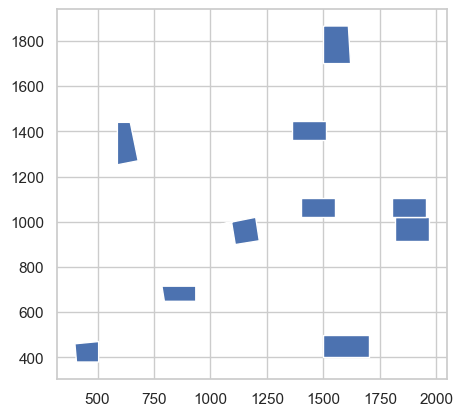

In [44]:
gdf[gdf['type']==13].plot()

In [45]:
gdf[gdf['type']==13]

,type,existence,geometry,population,traffic,rect,eqi,sc
355,13,True,"POLYGON ((505 470, 505 379.436, 407.006 379.43...",NaN,NaN,0.915114,0.998020,0.990617
356,13,True,"POLYGON ((588 1440, 645 1440, 680 1270, 588 12...",NaN,NaN,0.780123,0.965465,0.822551
423,13,True,"POLYGON ((1500 1866.379, 1610.213 1866.379, 16...",NaN,NaN,0.959221,0.995916,0.965834
432,13,True,"POLYGON ((1818 1020, 1955 1020, 1968 1020, 196...",NaN,NaN,1.000000,1.000000,0.967202
441,13,True,"POLYGON ((1400 1105, 1550 1105, 1550 1020, 140...",NaN,NaN,1.000000,1.000000,0.923495
443,13,True,"POLYGON ((935 715, 935 648.051, 795.899 648.05...",NaN,NaN,0.963671,1.004867,0.861781
451,13,True,"POLYGON ((1360 1445, 1510 1445, 1510 1360, 136...",NaN,NaN,1.000000,1.000000,0.923495
453,13,True,"POLYGON ((1500 500, 1700 500, 1700 400, 1500 4...",NaN,NaN,1.000000,1.000000,0.888889
461,13,True,"POLYGON ((1805 1105, 1955 1105, 1955 1020, 181...",NaN,NaN,1.000000,1.000000,0.923495
463,13,True,"POLYGON ((1200 1020, 1216 916, 1109.642 899.05...",NaN,NaN,0.692717,0.843353,0.686212


In [39]:
gdf.loc[gdf['type']==6,'type']=13

In [48]:
gdf.loc[gdf.index.isin([453, 441]), 'type'] = 6